In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

ACC_G = 9.81

In [26]:
datafile = "data/00041.csv"

df = pd.read_csv(datafile)
t = df["t"].to_numpy()[:100]
vEgo = df["vEgo"].to_numpy()[:100]
aEgo = df["aEgo"].to_numpy()[:100]
roll_la = np.sin(df["roll"].to_numpy()[:100]) * ACC_G
target_la = df["targetLateralAcceleration"].to_numpy()[:100]
steerCommands = -df["steerCommand"].to_numpy()[:100]

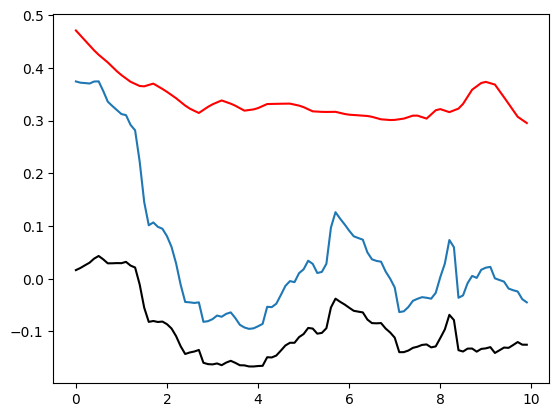

In [27]:
plt.plot(t, target_la)
plt.plot(t, roll_la, color='r')
plt.plot(t, steerCommands, color='black')
plt.show()

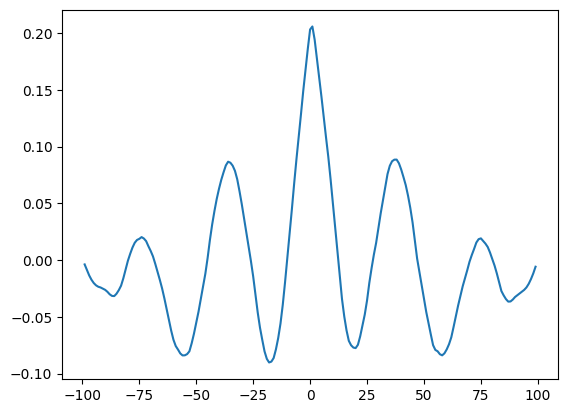

1


In [22]:
plt.plot(signal.correlation_lags(100, 100), signal.correlate(target_la - target_la.mean(), steerCommands - steerCommands.mean()))
plt.show()
print(signal.correlation_lags(100, 100)[np.argmax(signal.correlate(target_la - target_la.mean(), steerCommands - steerCommands.mean()))])